In [115]:
import pyodbc
import pandas as pd
import numpy as np
import random
import datetime

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

from UtilesValorizacion import StrTabla2ArrTabla, diferencia_dias_convencion

In [116]:
server = '172.16.1.38'
username = 'sa'
password = 'qwerty123'
driver = '{ODBC Driver 17 for SQL Server}'
cn = pyodbc.connect('DRIVER=' + driver + ';SERVER=' + server + ';UID=' + username + ';PWD=' + password)

In [117]:
def solicitar_bonos_ejemplo(n):
    bonos = 'SELECT TOP (' + str(n) + ') TablaDesarrollo, FechaEmision FROM [dbAlgebra].[dbo].[TdNemoRF] ORDER BY Fecha DESC'
    bonos = pd.read_sql(bonos, cn)
    return pd.DataFrame(bonos)

In [118]:
bonos = solicitar_bonos_ejemplo(10)
bonos

,TablaDesarrollo,FechaEmision
0,"1#01-09-2010#2,25#0#100#2,25|2#01-03-2011#2,25...",2010-03-01
1,"1#01-12-2018#0,8464#0#100#0,8464|2#01-06-2019#...",2018-06-01
2,"1#01-12-2018#2,1274#0#100#2,1274|2#01-06-2019#...",2018-06-01
3,"1#15-03-2010#2,2252#0#100#2,2252|2#15-09-2010#...",2009-09-15
4,"1#01-06-2010#2,2252#0#100#2,2252|2#01-12-2010#...",2009-12-01
5,"1#10-06-2019#3,82256919571133#0#100#3,82256919...",2018-06-11
6,"1#11-11-2019#3,71198428134404#0#100#3,71198428...",2018-11-12
7,"1#11-06-2019#3,83385917357224#0#100#3,83385917...",2018-06-11
8,"1#10-01-2018#3,8222367294881#0#100#3,822236729...",2017-01-10
9,"1#13-05-2019#3,79274514526169#0#100#3,79274514...",2018-05-11


In [119]:
def get_fechas(bonos):
    tabla = np.array([])
    for i in range(np.size(bonos,0)):
        a = StrTabla2ArrTabla(bonos.iloc[i]['TablaDesarrollo'], bonos.iloc[i]['FechaEmision'].to_pydatetime().date().strftime('%Y-%m-%d'))
        fechas = a[:,1]
        tabla = np.append(tabla,fechas)
    return tabla

tabla = get_fechas(bonos)
tabla

array([datetime.datetime(2010, 3, 1, 0, 0),
       datetime.datetime(2010, 9, 1, 0, 0),
       datetime.datetime(2011, 3, 1, 0, 0),
       datetime.datetime(2011, 9, 1, 0, 0),
       datetime.datetime(2012, 3, 1, 0, 0),
       datetime.datetime(2012, 9, 1, 0, 0),
       datetime.datetime(2013, 3, 1, 0, 0),
       datetime.datetime(2013, 9, 1, 0, 0),
       datetime.datetime(2014, 3, 1, 0, 0),
       datetime.datetime(2014, 9, 1, 0, 0),
       datetime.datetime(2015, 3, 1, 0, 0),
       datetime.datetime(2015, 9, 1, 0, 0),
       datetime.datetime(2016, 3, 1, 0, 0),
       datetime.datetime(2016, 9, 1, 0, 0),
       datetime.datetime(2017, 3, 1, 0, 0),
       datetime.datetime(2017, 9, 1, 0, 0),
       datetime.datetime(2018, 3, 1, 0, 0),
       datetime.datetime(2018, 9, 1, 0, 0),
       datetime.datetime(2019, 3, 1, 0, 0),
       datetime.datetime(2019, 9, 1, 0, 0),
       datetime.datetime(2020, 3, 1, 0, 0),
       datetime.datetime(2020, 9, 1, 0, 0),
       datetime.datetime(2021, 3

In [120]:
def dict_fechas(tabla, fecha_valorizacion):
    fechas = dict()
    for i in range(len(tabla)):
        if tabla[i].date() >= fecha_valorizacion:
            if (tabla[i].date() not in fechas.keys()) :
                fechas[tabla[i].date()] = 1
            else:
                fechas[tabla[i].date()] += 1
    return fechas

fechas = dict_fechas(tabla, datetime.date(2020,2,2))
fechas
            

{datetime.date(2020, 3, 1): 1,
 datetime.date(2020, 9, 1): 1,
 datetime.date(2021, 3, 1): 1,
 datetime.date(2021, 9, 1): 1,
 datetime.date(2022, 3, 1): 1,
 datetime.date(2022, 9, 1): 1,
 datetime.date(2023, 3, 1): 1,
 datetime.date(2023, 9, 1): 1,
 datetime.date(2024, 3, 1): 1,
 datetime.date(2024, 9, 1): 1,
 datetime.date(2025, 3, 1): 1,
 datetime.date(2025, 9, 1): 1,
 datetime.date(2026, 3, 1): 1,
 datetime.date(2026, 9, 1): 1,
 datetime.date(2027, 3, 1): 1,
 datetime.date(2027, 9, 1): 1,
 datetime.date(2028, 3, 1): 1,
 datetime.date(2028, 9, 1): 1,
 datetime.date(2029, 3, 1): 1,
 datetime.date(2029, 9, 1): 1,
 datetime.date(2030, 3, 1): 1,
 datetime.date(2030, 9, 1): 1,
 datetime.date(2031, 3, 1): 1,
 datetime.date(2031, 9, 1): 1,
 datetime.date(2032, 3, 1): 1,
 datetime.date(2032, 9, 1): 1,
 datetime.date(2033, 3, 1): 1,
 datetime.date(2033, 9, 1): 1,
 datetime.date(2034, 3, 1): 1,
 datetime.date(2034, 9, 1): 1,
 datetime.date(2035, 3, 1): 1,
 datetime.date(2020, 6, 1): 3,
 datetim

99


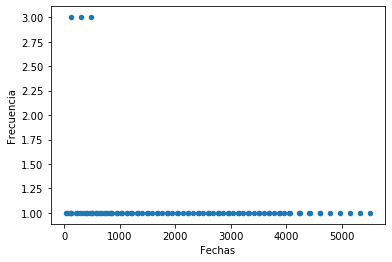

In [121]:
def dict_to_df(dict, fecha_valorizacion):
    df = pd.DataFrame()
    df['Fechas'] = dict.keys()
    df['Frecuencia'] = dict.values()
    df['Fechas'] = df['Fechas'].apply(lambda x: diferencia_dias_convencion('ACT/360', fecha_valorizacion, x))
    print(sum(dict.values()))
    return df

x = dict_to_df(fechas, datetime.date(2020,2,2))
x.plot.scatter(x='Fechas', y='Frecuencia')
    

In [122]:
y = pd.DataFrame()
y['Clasificacion'] = [random.randint(0,10) for _ in range(np.size(x,0))]
y

,Clasificacion
0,10
1,10
2,1
3,7
4,4
...,...
88,10
89,9
90,0
91,10


In [123]:
kmeans = KMeans(n_clusters=10).fit(x)
centroids = kmeans.cluster_centers_
print(pd.DataFrame(centroids))

             0         1
0  4469.714286  1.000000
1   657.000000  1.142857
2  2620.111111  1.000000
3  5233.000000  1.000000
4  3229.636364  1.000000
5  1585.000000  1.000000
6   208.923077  1.307692
7  3837.444444  1.000000
8  1124.100000  1.000000
9  2072.222222  1.000000


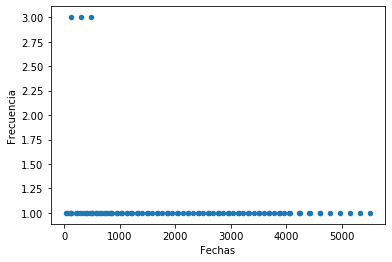

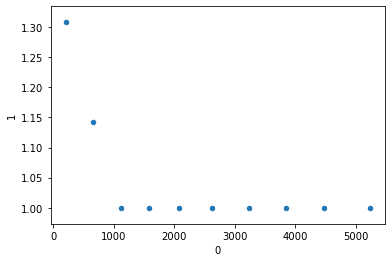

In [124]:
x.plot.scatter(x='Fechas', y='Frecuencia')
pd.DataFrame(centroids).plot.scatter(x=0, y=1)